## Importar


In [1]:
import numpy as np
import matplotlib.pyplot as plt
#importar geopy: pip install geopy

## Funcoes

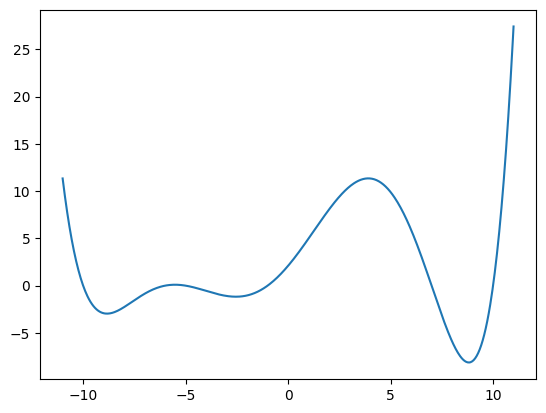

In [ ]:
def function(x):
    return (x+10)*(x+6)*(x+5)*(x+1)*(x-7)*(x-10)/10000
xx = np.linspace(-11,11,600)
x = xx
plt.plot(xx, function(x))
fv = function(x)

## SA

In [386]:
def SA(search_space, F, T, opc,convR):
    scale = np.sqrt(T) ## Suggested by Robert & Casella (Intro to MC)
    start = np.random.choice(search_space)
    x = -10
    print('Pontos iniciais: ', x, F(x))
    best = x
    convergencia = []
    history = [x]
    nProg = 0
    i = 0
    while True:
        i+=1
        # Cálculo da vizinhança
        candidate = x + np.random.normal()*scale #.uniform(-1, 1, size=1) * scale

        if candidate <= 11 and candidate >= -11:
            # Diferença de Energia
            deltaE = F(candidate) - F(x)

            # Aceitação probabilística
            b = np.random.rand()
            if np.log(b)*T - deltaE < 0: # Caso TRUE, o candidato é descartado
                candidate = x  

            x = candidate

            if F(x) < F(best):
                best = x
                nProg = 0
            else:
                nProg += 1
            convergencia.append(F(x))
            if i > convR:
                del convergencia[0]
                if np.std(convergencia) <= 1e-3:
                    print(f'Convergiu em {i} iterações, desvio padrão: {np.std(convergencia)}')
                    break

            T = resfriamento(T,i,deltaE, 0.9, 0, opc, nProg)
            history.append(x)
        
    dicio = {'1': 'Linear', '2': 'Geométrico', '3': 'Logarítimico', '4': 'Híbrido', '5': 'Exponencial', '6': 'Adaptativo', '7': 'Fast'}
    print(f'Escolhido: \n   Resfriamento {dicio[str(opc)]}')
    return x, history, best
    
def resfriamento(T, k, deltaE, a = 0.75, b = 0, opc = 0, nProg = 0):
    if opc == 1: # Linear
        T = T - a
    elif opc == 2: # Geométrica
        T = a*T
    elif opc == 3: # Logarítimica
        T = (np.log(k)/np.log(k+1)) * T
    elif opc == 4: # Híbrida
        if k <= b:
            T = (k/(k+1))*T
        else:
            T = a*T
    elif opc == 5: # Exponencial - Converge em 10000
        T = T/(1+b*T)
    elif opc == 6: # Adaptativa, ASA
        if nProg > 4:
            a *= 1.1
        else:
            a *= 0.9
        T *= a
    elif opc == 7: # Fast, FSA
        T = T/(1+k)
    return T

## Testes

Pontos iniciais:  -10 0.0
Convergiu em 631 iterações, desvio padrão: 1.7763568394002505e-15
Escolhido: 
   Resfriamento Fast


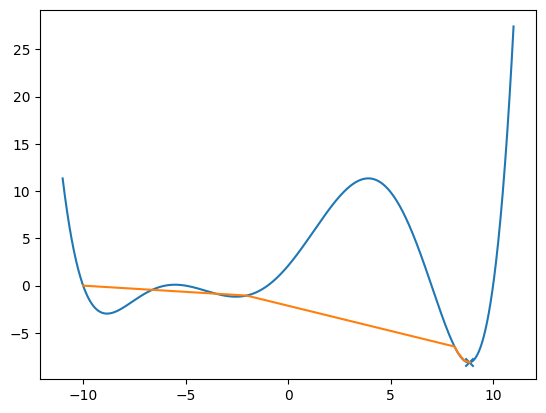

In [387]:
X = np.linspace(-11, 11, num=1000)
x1, history, best = SA(X, function, T = 100, opc = 7, convR = 300)

plt.plot(X, function(X))
plt.scatter(x1, function(x1), marker='x')
#plt.scatter(best, function(best), marker='o')
plt.plot(history, [function(y) for y in history])